# Milestone 1 Phase 1

# Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

`Rio Armiga - FTDS-012`

Dataset : https://console.cloud.google.com/bigquery?sq=1005126397141:5fc9cc617e6144e19fe7e0e024a7c219

Objective : Predict whether a person will default in payment next month or not with Logistic Regression, SVM, Decission Tree, Random Forest, KNN, Naive Bayes, dan other Algoritm, and implementing model improvement using Cross Validation and Grid Search

# Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('h8dsft_P1M1_rio_armiga.csv')
pd.set_option('display.max.columns', None)
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


Deskripsi dari Nama Kolom

- limit_balance: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- sex: Gender, 1=male, 2=female
- education_level: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- Marital_status 1=married, 2=single, 3=others
- pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2: Repayment status in August, 2005
- pay_3: Repayment status in July, 2005
- pay_4: Repayment status in June, 2005
- pay_5: Repayment status in May, 2005
- pay_6: Repayment status in April, 2005
- bill_amt_1 - bill_amt_6: Amount of bill statement in September - April Desc, 2005 (NT dollar)
- pay_amt_1 - pay_amt_6: Amount of previous payment in September - April desc, 2005 (NT dollar)
-default_payment_next_month: Default payment (1=yes, 0=no)

Mengubah nama kolom pay_0 menjadi pay_1, agar seragam seperti bill_amt_1 dan pay_amt_1, dimulai dari 1 untuk bulan septermber

In [3]:
data = data.rename(columns = {'sex':'gender', 'pay_0':'pay_1'})

# Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [4]:
data.head(2)

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0


Melihat data gender

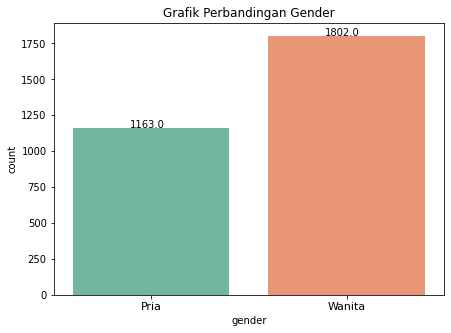

In [5]:
plt.figure(figsize=(7, 5))
plt.title('Grafik Perbandingan Gender')
ax =sns.countplot(data=data,x='gender', palette='Set2')
plt.xticks([0,1],['Pria','Wanita'], fontsize = 11)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.29, p.get_height()+0.6))

- Terdapat 1.802 orang wanita dan 1.163 pria pada dataset ini

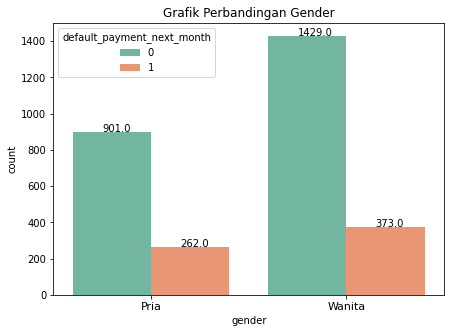

In [6]:
plt.figure(figsize=(7, 5))
plt.title('Grafik Perbandingan Gender')
ax =sns.countplot(data=data,x='gender', hue='default_payment_next_month', palette='Set2')
plt.xticks([0,1],['Pria','Wanita'], fontsize = 11)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.6))

Melihat data education level

In [7]:
data.education_level.value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

- Karena tingkatan 0, 4, 5, dan 6 mewakili data unkwon dan other, data akan disatukan menjadi 0

In [8]:
data.education_level = data.education_level.replace([4,5,6],0)

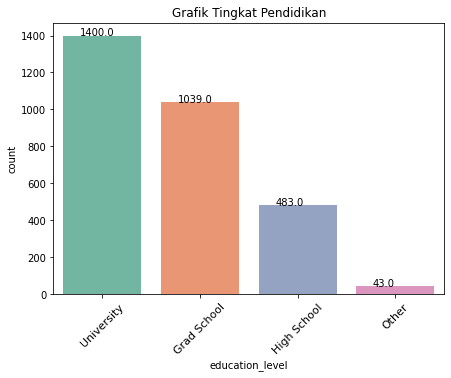

In [9]:
plt.figure(figsize=(7, 5))
plt.title('Grafik Tingkat Pendidikan')
ax = sns.countplot(data=data, x='education_level', palette='Set2',order = data['education_level'].value_counts().index)
plt.xticks([0,1,2,3],['University','Grad School','High School','Other'], fontsize = 11,rotation=45)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+0.6))

- 1.039 Orang lulus sekolah
- 1.400 orang lulusan universitas
- 483 orang lulusan SMA
- 43 orang dengan tingkat pendidikan tidak diketahui

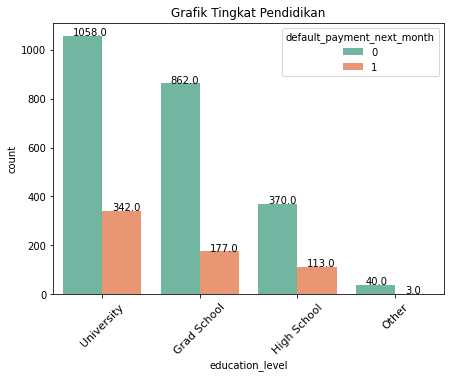

In [72]:
plt.figure(figsize=(7, 5))
total = float(len(data.education_level))
plt.title('Grafik Tingkat Pendidikan')
ax = sns.countplot(data=data, x='education_level', hue='default_payment_next_month', palette='Set2',order = data['education_level'].value_counts().index)
plt.xticks([0,1,2,3],['University','Grad School','High School','Other'], fontsize = 11,rotation=45)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.6))

Melihat data marital status

In [11]:
data.marital_status.value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

Menggabungkan data dengan value 0 dan 4 dan mengasumsikan nilai 3 adalah client dengan marital status devorce.

In [12]:
data.marital_status = data.marital_status.replace([0],3)

In [13]:
data.marital_status.value_counts()

2    1594
1    1332
3      39
Name: marital_status, dtype: int64

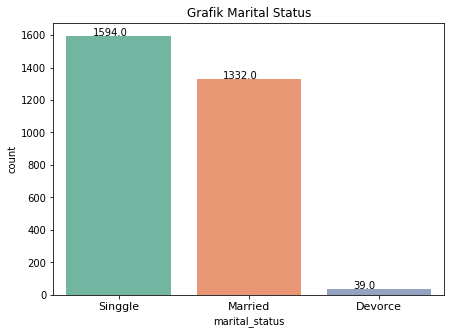

In [70]:
plt.figure(figsize=(7,5))
plt.title('Grafik Marital Status')
ax = sns.countplot(data=data,x='marital_status', palette='Set2', order = data['marital_status'].value_counts().index)
plt.xticks([0,1,2],['Singgle','Married','Devorce'], fontsize = 11)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.6))

- Terdapat 1.332 orang dengan status Married, 1.594 dengan status Single, dan 39 orang dengan status devorce

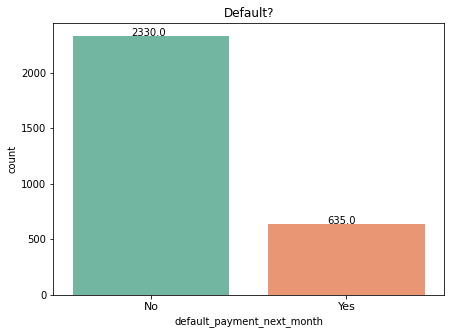

In [15]:
plt.figure(figsize=(7,5))
plt.title('Default?')
ax=sns.countplot(data=data,x='default_payment_next_month',palette='Set2', order = data['default_payment_next_month'].value_counts().index)
plt.xticks([0,1],['No','Yes'], fontsize = 11)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.6))

- Terdapat 2.330 yang atau 78.59% client yang diprediksi tidak lalai dalam membayar tagihan dan 635 atau sekitar 21.41% yang diprediksi akan lalai dalam membayar tagihan 

Melihat Sebaran Umur Client

<AxesSubplot:xlabel='age', ylabel='Count'>

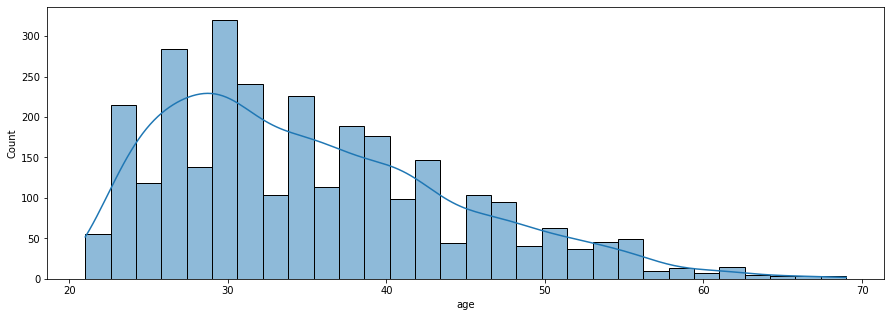

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(data.age, bins=30, kde=True, palette='Set2')

- Sebaran umur terbanyak terdapat pada range 20-40 tahun
- Dari grafik juga dapat dilihat bahwa feature age merupakan skewed distribution data.

[Text(0.5, 1.0, 'Grafik Hubungan Umur Vs Limit Balance')]

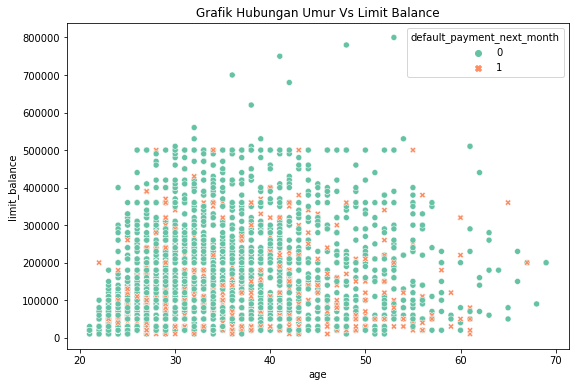

In [17]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='age',y='limit_balance',data=data, hue='default_payment_next_month', style='default_payment_next_month',palette='Set2').set(title='Grafik Hubungan Umur Vs Limit Balance')

- Mayoritas Client yang akan lalai dalam membayar tagihan bulan depan memiliki limit balance <400.000 
- Umur tidak berpengaruh siginifikan terhadap client akan lalai dalam membayar tahihan kartu kredit atau tidak di bulan depan

Apakah gender mempengaruhi limit balance?

c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x1a657535dc0>,
 [Text(0, 0, 'Pria'), Text(1, 0, 'Wanita')])

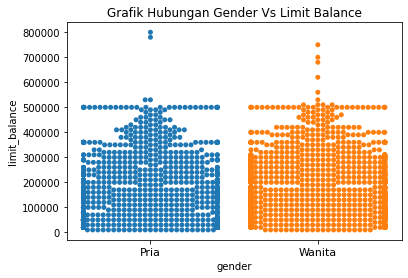

In [18]:
sns.swarmplot(x="gender", y="limit_balance", data=data).set(title='Grafik Hubungan Gender Vs Limit Balance')
plt.xticks([0,1],['Pria','Wanita'], fontsize = 11)

- Dari sebaran data pada grafik Grafik Hubungan Gender Vs Limit Balance dapat dilihat bahwa limit tingginya limit balance tidak ditentukan oleh gender

Apakah education level mempengaruhi limit balance?

c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x1a657845880>,
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Grad School'),
  Text(2, 0, 'University'),
  Text(3, 0, 'High School')])

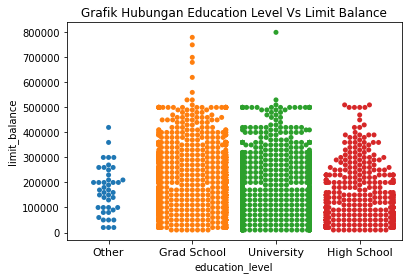

In [19]:
sns.swarmplot(x="education_level", y="limit_balance", data=data).set(title='Grafik Hubungan Education Level Vs Limit Balance')
plt.xticks([0,1,2,3],['Other','Grad School','University','High School'], fontsize = 11)

- Dari grafik Hubungan Education Level Vs Limit Balance dapat dilihat bahwa, client yang tingkat pendidikan dengan kategori oher memiliki limit balance yang rendah.

Apakah client dengan limit balance rendah cenderung lalai dalam membayarkan tagihan?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '10000'),
  Text(1, 0, '20000'),
  Text(2, 0, '30000'),
  Text(3, 0, '40000'),
  Text(4, 0, '50000'),
  Text(5, 0, '60000'),
  Text(6, 0, '70000'),
  Text(7, 0, '80000'),
  Text(8, 0, '90000'),
  Text(9, 0, '100000'),
  Text(10, 0, '110000'),
  Text(11, 0, '120000'),
  Text(12, 0, '130000'),
  Text(13, 0, '140000'),
  Text(14, 0, '150000'),
  Text(15, 0, '160000'),
  Text(16, 0, '170000'),
  Text(17, 0, '180000'),
  Text(18, 0, '190000'),
  Text(19, 0, '200000'),
  Text(20, 0, '210000'),
  Text(21, 0, '220000'),
  Text(22, 0, '230000'),
  Text(23, 0, '240000'),
  Text(24, 0, '250000'),
  Text(25, 0, '260000'),
  Text(26, 0, '270000'),
  Text(27, 0, '280000'),
  Text(28, 0, '290000'),
  Text(29, 0, '300000'),

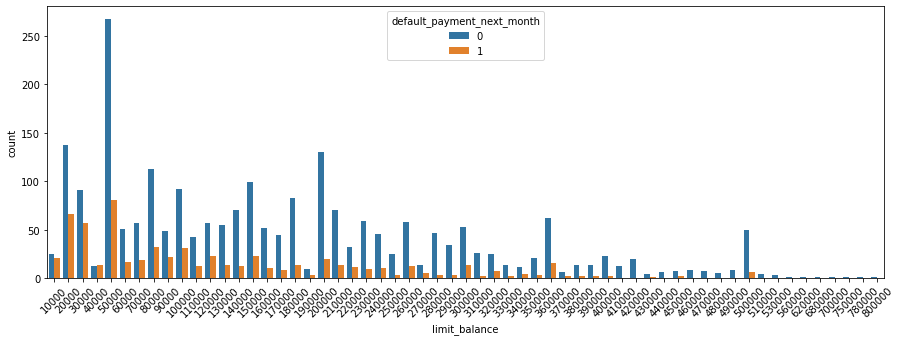

In [20]:
plt.figure(figsize=(15,5))
sns.countplot( x="limit_balance", data=data, hue='default_payment_next_month')
plt.xticks(rotation=45)

c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rioar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x1a658d4f280>,
 [Text(0, 0, 'Tidak'), Text(1, 0, 'Ya')])

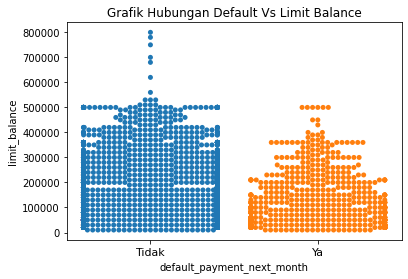

In [21]:
sns.swarmplot(x="default_payment_next_month", y="limit_balance", data=data).set(title='Grafik Hubungan Default Vs Limit Balance')
plt.xticks([0,1],['Tidak','Ya'], fontsize = 11)

- Dari grafik Hubungan Default Vs Limit Balance dapat dilihat bahwa, client dengan limit balance rendah cenderung akan lalai dalam membayar tagihan bulan.

Membagi data menjadi untuk melihat korelasi menggunakan heatmap

In [22]:
data_corr=data[['limit_balance', 'gender', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default_payment_next_month']]
data_corr2=data[['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6', 'default_payment_next_month']]

Melihat korelasi data_corr menggunakan heatmap

<AxesSubplot:>

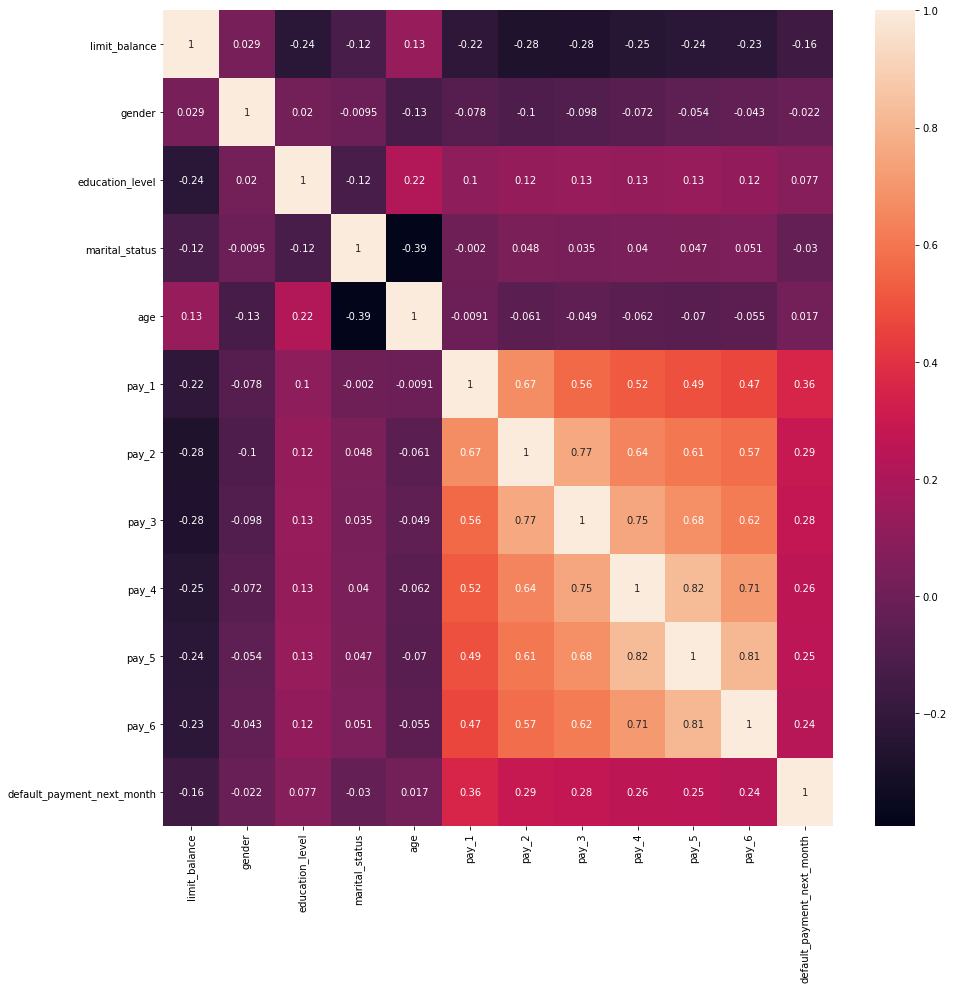

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data_corr.corr(), annot=True)

- Kolom Default next month memiliki korelasi paling tinggi dengan kelompok pay, dengan korelasi tertinggi terdapat pada pay_1 dengan nilai korelasi 0.36, dan paling kecil korelasinya dengan marital status dengan -0.03.
- Kelompok kolom pay memiliki korelasi yang tinggi antarkolomnya dengan poin korelasi paling tinggi sebesar 0.81 antara pay_5 dan pay_6

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'bill_amt_1'),
  Text(0, 1.5, 'bill_amt_2'),
  Text(0, 2.5, 'bill_amt_3'),
  Text(0, 3.5, 'bill_amt_4'),
  Text(0, 4.5, 'bill_amt_5'),
  Text(0, 5.5, 'bill_amt_6'),
  Text(0, 6.5, 'pay_amt_1'),
  Text(0, 7.5, 'pay_amt_2'),
  Text(0, 8.5, 'pay_amt_3'),
  Text(0, 9.5, 'pay_amt_4'),
  Text(0, 10.5, 'pay_amt_5'),
  Text(0, 11.5, 'pay_amt_6'),
  Text(0, 12.5, 'default_payment_next_month')])

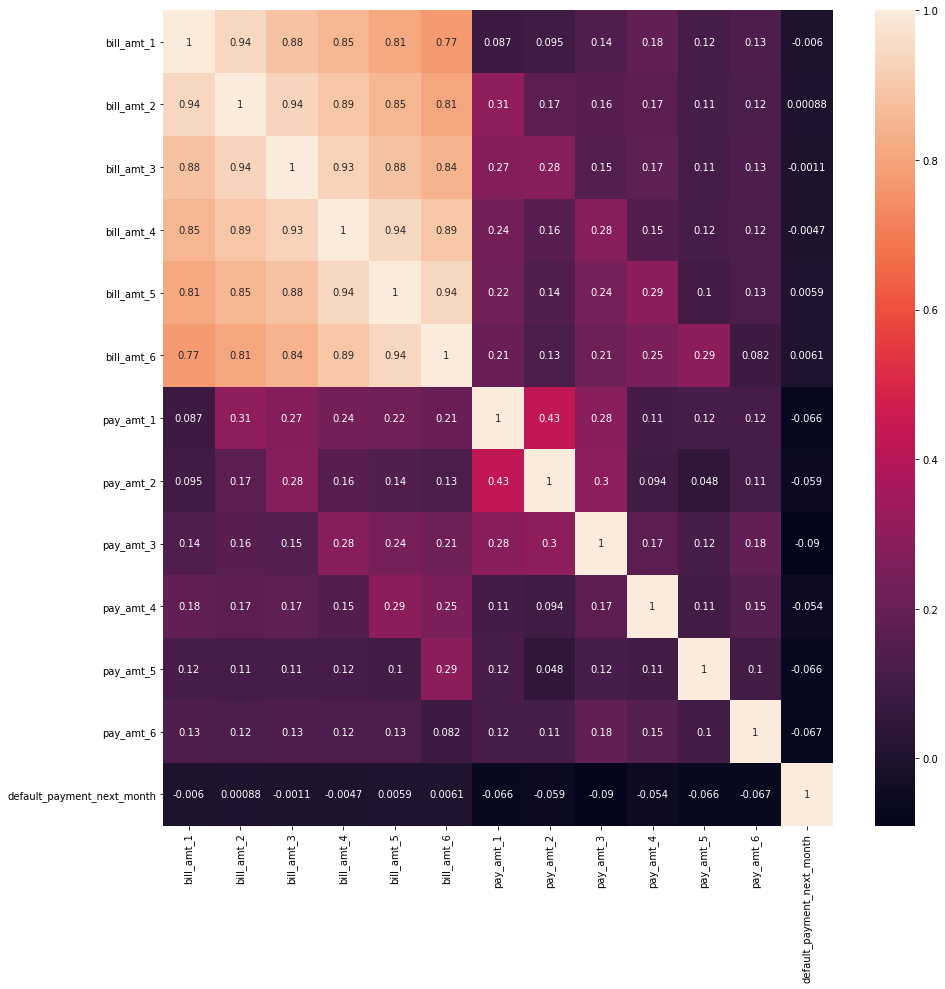

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data_corr2.corr(), annot=True)
plt.yticks(rotation=0)

- Kelompok kolom bill_amt memiliki korelasi sangat kecil dengan kolom default payment, korelasi terbesar pada kelompok tersebut hanya 0.0061 poin pada kolom bill_amt_6 dengan kolom default payment
- Kelompok pay_amt juga memiliki korelasi yang kecil dengan kolom default payment, dengan score korelasi tertinggi terdapat pada pay_amt_3 dengan score korelasi -0.09 dengan kolom default payment

# Data Preprocessing

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Memisakan Data untuk Model Inference

Membagi data inference untuk menguji model dengan data baru.

In [25]:
# Membagi data Inference dan Data train_test
data_inf = data.sample(10, random_state=4)
data_train_test = data.drop(data_inf.index)
# Reset index pada data Inference dan Data train_test
data_inf.reset_index(drop=True, inplace=True) 
data_train_test.reset_index(drop=True, inplace=True)

data_train_test

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2951,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2952,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2953,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


- Data sudah berkurang 10 baris, dari semula 2.965  baris, sekarang data brejumlah 2.955 baris
- Pemisahan data_inf bertujuan untuk menjadi data yang diprediksi ketika model sudah berhasil dibuat

## Memisahkan Feature (X) dan label (y)

Melakukan splitting data X (Feature), y (label/target), yang menjadi target adalah kolom income_bracket

In [26]:
# X : Feature
# y : label/target
X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
X.head(2)

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000


Memisahkan data train dan test

In [27]:
# Memisahkan data Train dan Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Test Size  : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (2659, 23)
Test Size  :  (296, 23)
Test Size  :  (2659,)
Test Size  :  (296,)


## Columns categorization

Memisahkan numerical column categorical column nominal dan categorical column ordinal

In [28]:
# Numerical Column
numerical_col = X_train[['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].columns.tolist()
# Cat column nominalordinal
categorical_col_nor = X_train[['gender','marital_status']].columns.tolist()
# Cat column ordinal
categorical_col_or = X_train[['education_level','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']].columns.tolist()


X_train_numerical_col = X_train[numerical_col]
X_train_categorical_col_nor = X_train[categorical_col_nor]
X_train_categorical_col_or = X_train[categorical_col_or]

X_test_numerical_col = X_test[numerical_col]
X_test_categorical_col_nor = X_test[categorical_col_nor]
X_test_categorical_col_or = X_test[categorical_col_or]
X_test_numerical_col

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2119,220000,33,9649,8300,1590,1341,8171,14253,8300,1590,1341,8171,14253,3513
1781,50000,26,38160,40213,41167,41890,42605,41792,3000,1900,1700,1700,0,2500
365,180000,25,12891,14275,15737,16603,17395,17182,1600,2000,1500,1003,1003,1006
812,80000,41,35646,38040,39562,40427,43417,46878,3000,2135,2000,3500,4000,3000
2878,10000,30,390,0,780,0,0,0,0,780,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,130000,33,1022,0,0,0,0,0,0,0,0,0,0,0
2574,260000,29,1267,553,0,202,11990,3359,553,0,202,11990,3359,1035
2757,340000,33,411,10983,8548,11190,8210,7981,11038,8591,11246,8251,8021,0
128,90000,41,48276,47820,46602,47141,16114,15825,2281,1219,1164,556,595,480


## Handle Outlier

Melihat statistika descriptive dari data train set

In [29]:
X_train.describe()

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.00000,2659.000000,2.659000e+03,2659.000000,2659.000000,2659.000000,2659.000000
mean,163429.860850,1.603986,1.776984,1.567507,35.162091,0.003761,-0.130124,-0.145543,-0.183904,-0.230914,-0.264385,51584.577661,50149.655134,47923.040241,43555.586311,40476.940203,39343.23994,6225.730726,6.512518e+03,5119.084618,4630.840542,4961.000376,5560.197819
std,125433.964036,0.489159,0.725425,0.521412,9.140718,1.109498,1.174884,1.189159,1.191750,1.166729,1.171061,72278.519992,70857.716859,68300.844899,61501.615715,57838.144090,56802.25901,19642.179663,3.035148e+04,14005.355529,13736.712801,17265.356081,17920.770497
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3742.500000,3097.500000,3130.500000,2453.000000,1699.500000,1325.00000,1000.000000,8.900000e+02,415.500000,294.000000,316.000000,171.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24002.000000,22385.000000,21197.000000,19588.000000,18590.000000,18216.00000,2200.000000,2.200000e+03,1949.000000,1572.000000,1619.000000,1696.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69179.000000,67721.500000,63007.500000,58134.500000,52510.500000,51864.00000,5098.500000,5.004500e+03,4600.000000,4000.000000,4021.000000,4131.000000
max,800000.000000,2.000000,3.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.00000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Melakukan pengecekan distribusi data

In [30]:
# Input Paramater Distribution  Check
dis_check = X_train_numerical_col.skew()

normal_dis = []
skew_dis = []

for i in range(len(dis_check)):
    if dis_check.values[i] < -0.5:
        skew_dis.append(dis_check.index[i])
    elif dis_check.values[i] > 0.5:
        skew_dis.append(dis_check.index[i])
    else:
        normal_dis.append(dis_check.index[i])

Melihat hasil dari penegecekan distribusi data

In [31]:
# Skew dist
print('skew_dist :', skew_dis)
print("==================="*10)
# normal_dist
print('normal_dist :', normal_dis)
print("==================="*10)

skew_dist : ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
normal_dist : []


- Feature 'limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' merupakan data dengan distribusi skewed

In [32]:
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

Check outlier on train set

In [33]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dis:
    detect_skew(X_train_numerical_col, parameter=i)

{'Parameter': 'limit_balance', 'Total Outliers': 12, 'Percentage': 0.45}
{'Parameter': 'age', 'Total Outliers': 26, 'Percentage': 0.98}
{'Parameter': 'bill_amt_1', 'Total Outliers': 199, 'Percentage': 7.48}
{'Parameter': 'bill_amt_2', 'Total Outliers': 199, 'Percentage': 7.48}
{'Parameter': 'bill_amt_3', 'Total Outliers': 204, 'Percentage': 7.67}
{'Parameter': 'bill_amt_4', 'Total Outliers': 187, 'Percentage': 7.03}
{'Parameter': 'bill_amt_5', 'Total Outliers': 215, 'Percentage': 8.09}
{'Parameter': 'bill_amt_6', 'Total Outliers': 205, 'Percentage': 7.71}
{'Parameter': 'pay_amt_1', 'Total Outliers': 251, 'Percentage': 9.44}
{'Parameter': 'pay_amt_2', 'Total Outliers': 264, 'Percentage': 9.93}
{'Parameter': 'pay_amt_3', 'Total Outliers': 232, 'Percentage': 8.73}
{'Parameter': 'pay_amt_4', 'Total Outliers': 252, 'Percentage': 9.48}
{'Parameter': 'pay_amt_5', 'Total Outliers': 258, 'Percentage': 9.7}
{'Parameter': 'pay_amt_6', 'Total Outliers': 229, 'Percentage': 8.61}


Check outlier on test set

In [34]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dis:
    detect_skew(X_test_numerical_col, parameter=i)

{'Parameter': 'limit_balance', 'Total Outliers': 2, 'Percentage': 0.68}
{'Parameter': 'age', 'Total Outliers': 3, 'Percentage': 1.01}
{'Parameter': 'bill_amt_1', 'Total Outliers': 15, 'Percentage': 5.07}
{'Parameter': 'bill_amt_2', 'Total Outliers': 27, 'Percentage': 9.12}
{'Parameter': 'bill_amt_3', 'Total Outliers': 26, 'Percentage': 8.78}
{'Parameter': 'bill_amt_4', 'Total Outliers': 25, 'Percentage': 8.45}
{'Parameter': 'bill_amt_5', 'Total Outliers': 24, 'Percentage': 8.11}
{'Parameter': 'bill_amt_6', 'Total Outliers': 29, 'Percentage': 9.8}
{'Parameter': 'pay_amt_1', 'Total Outliers': 25, 'Percentage': 8.45}
{'Parameter': 'pay_amt_2', 'Total Outliers': 22, 'Percentage': 7.43}
{'Parameter': 'pay_amt_3', 'Total Outliers': 29, 'Percentage': 9.8}
{'Parameter': 'pay_amt_4', 'Total Outliers': 19, 'Percentage': 6.42}
{'Parameter': 'pay_amt_5', 'Total Outliers': 26, 'Percentage': 8.78}
{'Parameter': 'pay_amt_6', 'Total Outliers': 23, 'Percentage': 7.77}


Membuat capper pipeline untuk handling outlier pada model

In [35]:
# Menggunakan Winsorizer untuk data oulier
capper_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='right', fold=1.5))

# fit the capper
capper_pipeline.fit(X_train_numerical_col)

# transform the data
train_t= capper_pipeline.transform(X_train_numerical_col)
test_t= capper_pipeline.transform(X_test_numerical_col)

In [36]:
print('Data Before Capping')
X_train_numerical_col.describe()

Data Before Capping


,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.00000,2659.000000,2.659000e+03,2659.000000,2659.000000,2659.000000,2659.000000
mean,163429.860850,35.162091,51584.577661,50149.655134,47923.040241,43555.586311,40476.940203,39343.23994,6225.730726,6.512518e+03,5119.084618,4630.840542,4961.000376,5560.197819
std,125433.964036,9.140718,72278.519992,70857.716859,68300.844899,61501.615715,57838.144090,56802.25901,19642.179663,3.035148e+04,14005.355529,13736.712801,17265.356081,17920.770497
min,10000.000000,21.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3742.500000,3097.500000,3130.500000,2453.000000,1699.500000,1325.00000,1000.000000,8.900000e+02,415.500000,294.000000,316.000000,171.000000
50%,140000.000000,33.000000,24002.000000,22385.000000,21197.000000,19588.000000,18590.000000,18216.00000,2200.000000,2.200000e+03,1949.000000,1572.000000,1619.000000,1696.000000
75%,230000.000000,41.000000,69179.000000,67721.500000,63007.500000,58134.500000,52510.500000,51864.00000,5098.500000,5.004500e+03,4600.000000,4000.000000,4021.000000,4131.000000
max,800000.000000,69.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.00000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [37]:
print('Data After Capping')
train_t.describe()

Data After Capping


,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,162892.064686,35.130876,45376.272001,44069.436442,41691.237307,38256.596559,35169.739000,34325.128056,3603.491820,3535.216623,3069.674690,2697.939827,2735.758932,2822.898834
std,123494.485278,9.044368,52243.646276,51258.766702,48134.848501,44586.230116,41507.048309,41173.298866,3571.374793,3582.010103,3387.038749,3004.239507,3025.516779,3212.001053
min,10000.000000,21.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3742.500000,3097.500000,3130.500000,2453.000000,1699.500000,1325.000000,1000.000000,890.000000,415.500000,294.000000,316.000000,171.000000
50%,140000.000000,33.000000,24002.000000,22385.000000,21197.000000,19588.000000,18590.000000,18216.000000,2200.000000,2200.000000,1949.000000,1572.000000,1619.000000,1696.000000
75%,230000.000000,41.000000,69179.000000,67721.500000,63007.500000,58134.500000,52510.500000,51864.000000,5098.500000,5004.500000,4600.000000,4000.000000,4021.000000,4131.000000
max,500000.000000,60.500000,167333.750000,164657.500000,152823.000000,141656.750000,128727.000000,127672.500000,11246.250000,11176.250000,10876.750000,9559.000000,9578.500000,10071.000000


- Terlihat perbedaan nilai maximum data sebelum dilakukan capping dengan setelah dilakukan capping, pada kolom limit_balance, sebelum dilakukan capping nilai max sebesar 800000, setelah dilakukan capping berubah menjadi 500000, capping berhasil dilakukan

## Handling Missing Value

Membuat function untuk meendeteksi missing value

In [38]:
# create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

Deteksi missing value pada train set

In [39]:
# X_train Set
detect_missval(X_train)

Generate df_missval


,col_name,missing_count,missing_percentage


Deteksi missing value pada test set

In [40]:
# X_test Set
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage


Deteksi missing value pada label

In [41]:
# y_train
print('y_train: ',y_train.isna().sum())
# y_test
print('y_test: ', y_test.isna().sum())

y_train:  0
y_test:  0


- Tidak Terdapat Missing Value pada feature maupun label

## Feature Engineer

Melakukan scaler dengan MinMaxScaler untuk data numerical karena data numerical merupakan skewed distribution, melakukan encoder dengan OneHotEncoder karena data categorical nominal dan encoder dengan OrdinalEncoder pada data categorical ordinal

In [42]:
# Menggunakan MinMaxScaller karena data numerical merupakan skewed distribution
numerical_pipe = make_pipeline(MinMaxScaler())

# Menggunakan OneHotEncoder untukd data categorical nominal
nomimal_pipe = make_pipeline(OneHotEncoder())

# Menggunakan OrdinalEncoder untukd data categorical ordinal
ordinal_pipe = make_pipeline(OrdinalEncoder())

data_pipeline = ColumnTransformer([
    ('numerical_pipe', numerical_pipe, numerical_col),
    ('nomimal_pipe', nomimal_pipe, categorical_col_nor),
    ('ordinal_pipe', ordinal_pipe, categorical_col_or)
])


## Balancing Data

Melakukan balancing data dengan SMOTE karena dataset memiliki target yang tidak seimbang antar kelasnya

In [43]:
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Melakukan deklarasi model dengan Logistic Regression, SVM Classification, Decission Tree, Random Forest, KNN, Naive Bayes, dan Ada Boost, model dibungkus dengan pipeline

In [44]:
# Model Logistic Regression

logistic_pipeline = make_pipeline(capper_pipeline, data_pipeline, LogisticRegression())

# Model SVM
svm_pipeline = make_pipeline(capper_pipeline, data_pipeline, SVC())

# Model Decision Tree
tree_pipeline = make_pipeline(capper_pipeline, data_pipeline, DecisionTreeClassifier())

# Model Random Forest
rf_pipeline = make_pipeline(capper_pipeline, data_pipeline, RandomForestClassifier())

# Model KNN
knn_pipeline = make_pipeline(capper_pipeline, data_pipeline, KNeighborsClassifier())

# Model Naive Bayes
nb_pipeline = make_pipeline(capper_pipeline, data_pipeline, CategoricalNB())

# Model Ada Boost
ada_pipeline = make_pipeline(capper_pipeline, data_pipeline, AdaBoostClassifier())


# Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Logistic Regression

In [45]:
logistic_pipeline.fit(X_train,y_train)

c:\Users\rioar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## SVM

In [46]:
svm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## Decission Tree

In [47]:
tree_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## Random Forest

In [48]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## KNN

In [49]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## Naive Bayes

In [50]:
nb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

## Ada Boost Classifier

In [51]:
ada_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('winsorizer',
                                  Winsorizer(capping_method='iqr',
                                             fold=1.5))])),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay

# Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [52]:
#Performance Metrics
print('ROC AUC Train Results Logistic Regression')
print(roc_auc_score(y_train, logistic_pipeline.predict(X_train)))

print('ROC AUC Test Results Logistic Regression')
print(roc_auc_score(y_test, logistic_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results SVM')
print(roc_auc_score(y_train, svm_pipeline.predict(X_train)))

print('ROC AUC Test Results SVM')
print(roc_auc_score(y_test, svm_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results Decission Tree')
print(roc_auc_score(y_train, tree_pipeline.predict(X_train)))

print('ROC AUC Test Results Decission Tree')
print(roc_auc_score(y_test, tree_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results Random Forest')
print(roc_auc_score(y_train, rf_pipeline.predict(X_train)))

print('ROC AUC Test Results Random Forest')
print(roc_auc_score(y_test, rf_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results KNN')
print(roc_auc_score(y_train, knn_pipeline.predict(X_train)))

print('ROC AUC Test Results KNN')
print(roc_auc_score(y_test, knn_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results Naive Bayes')
print(roc_auc_score(y_train, nb_pipeline.predict(X_train)))

print('ROC AUC Test Results Naive Bayes')
print(roc_auc_score(y_test, nb_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results Ada Boost')
print(roc_auc_score(y_train, ada_pipeline.predict(X_train)))

print('ROC AUC Test Results Ada Boost')
print(roc_auc_score(y_test, ada_pipeline.predict(X_test)))


ROC AUC Train Results Logistic Regression
0.7256214149139579
ROC AUC Test Results Logistic Regression
0.7412174933194291
-------------------------------------------------
ROC AUC Train Results SVM
0.7770076481835565
ROC AUC Test Results SVM
0.7752395229094701
-------------------------------------------------
ROC AUC Train Results Decission Tree
1.0
ROC AUC Test Results Decission Tree
0.6183601642442809
-------------------------------------------------
ROC AUC Train Results Random Forest
1.0
ROC AUC Test Results Random Forest
0.7386430293945122
-------------------------------------------------
ROC AUC Train Results KNN
0.8458413001912046
ROC AUC Test Results KNN
0.7226422472788894
-------------------------------------------------
ROC AUC Train Results Naive Bayes
0.733508604206501
ROC AUC Test Results Naive Bayes
0.7594016815485889
-------------------------------------------------
ROC AUC Train Results Ada Boost
0.7770076481835564
ROC AUC Test Results Ada Boost
0.7388385583002021


- Ditinjau berdasarkan score ROC-AUC nya model Decission Tree dan Random Forest terindikasi overfit, karena terdapat perbedaan yang sangat jauh antara train dan test setnya, dan train setnya mendapatkan nilai ROC-AUC sempurna atau 1 sedangkan pada test setnya hanya sebesar 0.61 dan 0.74.
- Model KNN, SVM, Logistic Regression, Naive Bayes dan Ada Boost sudah good fit
- ROC-AUC score tertinggi pada model yang good fit terdapat pada model KNN dengan score pada train set 0.84 dan test set 0.72, selanjutnya pada model SVM dengan score pada train set 0.77 dan test set 0.77.
- Ditinjau berdasarkan ROC-AUC score pada test set, model SVM merupakan model paling baik dalam memprediksi label.

# Cross Validation

Melakukan Cross Validation pada semua model untuk melihat model mana yang paling baik dalam memprediksi model, CV dilakukan sebanyak 5 kali dengan accuracy sebagai metric penilaiannya

In [53]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(("Logistic", logistic_pipeline))
models.append(("SVM", svm_pipeline))
models.append(("Decission Tree", tree_pipeline))
models.append(("Random Forest",rf_pipeline))
models.append(("KNN",knn_pipeline))
models.append(("Naive Bayes",nb_pipeline))
models.append(("Ada Boost",ada_pipeline))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

c:\Users\rioar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Melihat hasil cross validation

In [54]:
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
3,Random Forest,0.8595,0.0478
4,KNN,0.7672,0.0286
2,Decission Tree,0.7670,0.0392
1,SVM,0.7612,0.0381
6,Ada Boost,0.7560,0.0498
5,Naive Bayes,0.7309,0.0269
0,Logistic,0.7216,0.0281


- Setelah dilakukan Cross Validation, Model Random forest memiliki mean score tertinggi, score yang didapatkan oleh model Random forest sebesar 0.8571 +-0.0533 untuk batas atas dan bawahnya

# Model Improvement

Melakukan Model Improvement menggunakan grid search pada model KNN karena model Random Forest dan Decission Tree terindikasi overfit.

In [1]:
model = knn_pipeline
log_param=[{
    'kneighborsclassifier__n_neighbors' : list(range(1,30)),
    'kneighborsclassifier__p' :[1,2,3,4]
}]

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=log_param, n_jobs=-1,cv=cv, scoring='recall', error_score=8)
grid_result = grid_search.fit(X_train,y_train)

print("Best:%fusing%s" % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']        
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print(" %f (%f) with: %r" %(mean,stdev,param))

NameError: name 'knn_pipeline' is not defined

- Hyperparameter tuning dilakukan dengan metric evaluation recall, karena untuk dataset ini kita menginginkan nilai recall atau true positive rate (TPR) yang tinggi, karena jika nilai TPR tinggi maka klient yang akan default payment atau kelas 1 lebih mudah terdeteksi. Nilai TPR tinggi akan menurunkan False Negative pada kelas 1, dan False Positive lebih dimaafkan daripada False Negative pada kasus ini.

In [56]:
y_pred_train_best_knn = grid_search.best_estimator_.predict(X_train)
y_pred_test_best_knn = grid_search.best_estimator_.predict(X_test)

In [57]:
#Performance Metrics
print('Recall Train Results KNN')
print(recall_score(y_train, knn_pipeline.predict(X_train)))

print('Recall Test Results KNN')
print(recall_score(y_test, knn_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('Recall Train Results KNN with Hyperparameter Tuning')
print(recall_score(y_train, y_pred_train_best_knn))

print('Recall Test Results KNN with Hyperparameter Tuning')
print(recall_score(y_test, y_pred_test_best_knn))

Recall Train Results KNN
0.875717017208413
Recall Test Results KNN
0.6417910447761194
-------------------------------------------------
Recall Train Results KNN with Hyperparameter Tuning
1.0
Recall Test Results KNN with Hyperparameter Tuning
0.5970149253731343


- Model KNN juga overfit setelah dilakukan hyperparameter tuning dengan grid search, jadi dilakukan kembali hyperparameter tuning menggunakan grid search pada model SVM

In [58]:
model = svm_pipeline
log_param=[{"svc__C":[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
            "svc__gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
            "svc__kernel":['rbf','linear']}]

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=log_param, n_jobs=-1,cv=cv, scoring='recall', error_score=8)
grid_result = grid_search.fit(X_train,y_train)

print("Best:%fusing%s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']        
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print(" %f (%f) with: %r" %(mean,stdev,param))

Best:0.938174using{'svc__C': 0.05, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
 0.613597 (0.021347) with: {'svc__C': 0.05, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
 0.698040 (0.021790) with: {'svc__C': 0.05, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
 0.639251 (0.028940) with: {'svc__C': 0.05, 'svc__gamma': 0.2, 'svc__kernel': 'rbf'}
 0.698040 (0.021790) with: {'svc__C': 0.05, 'svc__gamma': 0.2, 'svc__kernel': 'linear'}
 0.675100 (0.030075) with: {'svc__C': 0.05, 'svc__gamma': 0.3, 'svc__kernel': 'rbf'}
 0.698040 (0.021790) with: {'svc__C': 0.05, 'svc__gamma': 0.3, 'svc__kernel': 'linear'}
 0.734533 (0.027863) with: {'svc__C': 0.05, 'svc__gamma': 0.4, 'svc__kernel': 'rbf'}
 0.698040 (0.021790) with: {'svc__C': 0.05, 'svc__gamma': 0.4, 'svc__kernel': 'linear'}
 0.796680 (0.022288) with: {'svc__C': 0.05, 'svc__gamma': 0.5, 'svc__kernel': 'rbf'}
 0.698040 (0.021790) with: {'svc__C': 0.05, 'svc__gamma': 0.5, 'svc__kernel': 'linear'}
 0.851498 (0.019425) with: {'svc__C': 0.05, 'svc__gamma': 0

In [59]:
y_pred_train_best=grid_search.best_estimator_.predict(X_train)
y_pred_test_best=grid_search.best_estimator_.predict(X_test)

Melihat perbandingan score Model setelah di improve dengan menentukan hyperparameter dengan model sebelum di improve

In [60]:
#Performance Metrics
print('ROC AUC Train Results SVM')
print(roc_auc_score(y_train, svm_pipeline.predict(X_train)))

print('ROC AUC Test Results SVM')
print(roc_auc_score(y_test, svm_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('ROC AUC Train Results SVM with Hyperparameter Tuning')
print(roc_auc_score(y_train, grid_search.best_estimator_.predict(X_train)))

print('ROC AUC Test Results SVM with Hyperparameter Tuning')
print(roc_auc_score(y_test, grid_search.best_estimator_.predict(X_test)))


ROC AUC Train Results SVM
0.7770076481835565
ROC AUC Test Results SVM
0.7752395229094701
-------------------------------------------------
ROC AUC Train Results SVM with Hyperparameter Tuning
0.6118546845124283
ROC AUC Test Results SVM with Hyperparameter Tuning
0.5856742488431206


- Setelah dilakukan hyperparameter tuning score ROC-AUC pada model SVM terlihat menurun dari sebelum dilakukan hyperparameter tuning, karena nilai yang ingin dimaksimalkan adalah recall atau TPR

In [61]:
#Performance Metrics
print('Recall Train Results SVM')
print(recall_score(y_train, svm_pipeline.predict(X_train)))

print('Recall Test Results SVM')
print(recall_score(y_test, svm_pipeline.predict(X_test)))
print ('-------------------------------------------------')

print('Recall Train Results SVM with Hyperparameter Tuning')
print(recall_score(y_train, grid_search.best_estimator_.predict(X_train)))

print('Recall Test Results SVM with Hyperparameter Tuning')
print(recall_score(y_test, grid_search.best_estimator_.predict(X_test)))

Recall Train Results SVM
0.7332695984703633
Recall Test Results SVM
0.7164179104477612
-------------------------------------------------
Recall Train Results SVM with Hyperparameter Tuning
0.9297323135755258
Recall Test Results SVM with Hyperparameter Tuning
0.8656716417910447


- Nilai recall pada model svm dengan hyperparameter tuning terlihat meningkat dibandingkan sebelum dilakukan hyperparameter tuning, recal pada test set mendapatkan nilai 0.86 setelah hyperparameter tuning dan 0.71 sebelum hyperparameter tuning. Ini menunjukkan model improvement berhasil dilakukan

In [62]:
print ('Confussion Matrix Train Set')
print(classification_report(y_train,y_pred_train_best , target_names=['Not Default', 'Default']))
print('-'*60)
print ('Confussion Matrix Test Set')
print(classification_report(y_test,y_pred_test_best , target_names=['Not Default', 'Default']))

Confussion Matrix Train Set
              precision    recall  f1-score   support

 Not Default       0.81      0.29      0.43      2092
     Default       0.57      0.93      0.71      2092

    accuracy                           0.61      4184
   macro avg       0.69      0.61      0.57      4184
weighted avg       0.69      0.61      0.57      4184

------------------------------------------------------------
Confussion Matrix Test Set
              precision    recall  f1-score   support

 Not Default       0.89      0.31      0.45       229
     Default       0.27      0.87      0.41        67

    accuracy                           0.43       296
   macro avg       0.58      0.59      0.43       296
weighted avg       0.75      0.43      0.44       296



- Dapat dilihat, setelah dilakukan model improvement, nilai accuracy sangat kecil, itu juga terjadi karena kita ingin meningkatkan nilai recall pada model svm.

In [63]:
print ('Confussion Matrix')
print(confusion_matrix(y_train, y_pred_train_best))

print ('Confussion Matrix')
print(confusion_matrix(y_test, y_pred_test_best))

Confussion Matrix
[[ 615 1477]
 [ 147 1945]]
Confussion Matrix
[[ 70 159]
 [  9  58]]


<AxesSubplot:>

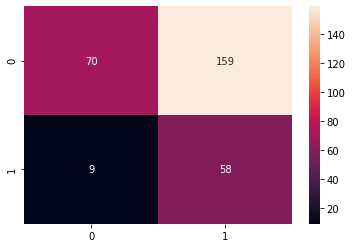

In [64]:
cf_matrix = confusion_matrix(y_test,y_pred_test_best)
sns.heatmap(cf_matrix, annot=True,fmt="d")

- Terdapat 58 orang yang terdeteksi dan benar akan lalai dalam membayar tagihan bulan depan atau True Positive (TP), dan 159 orang yang terdeteksi lalai membayar tagihan tetapi sebenarnya tidak lalai dalam membayar tagihan bulan depan atau False Positive (FP).
- Terdapat 70 orang yang terdeteksi dan benar tidak lalai dalam membayar tagihan bulan depan atau True Negative (TN), dan 9 orang yang terdeteksi tidak lalai dalam membayar tagihan bulan depan tetapi sebenarnya dia akan lalai dalam membayar tagihan bulan depan (FN).

# Model Inference

In [65]:
data_inf.head(2)

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,360000,2,3,1,37,-2,-2,-2,-2,-2,-2,0,0,0,0,0,239,0,0,0,0,239,0,0
1,220000,2,2,1,54,-1,-1,-1,-1,-2,-2,8727,2553,147,0,0,0,3011,147,0,0,0,0,0


Membagi data inference menjadi X(feature) dan y(target)

In [66]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = data_inf.drop(['default_payment_next_month'], axis=1)

# y will be consist of target parameter only
y_inf = data_inf['default_payment_next_month']

Melakukan predict Best Model dengan data inference

In [67]:
y_pred_inf = grid_search.best_estimator_.predict(X_inf)

Merubah data hasil prediksi menjadi DataFrame

In [68]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['SVM Prediction'])
y_pred_inf_df

,SVM Prediction
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,1


Mengggabungkan Dataframe hasil prediksi dengan data inference

In [69]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,SVM Prediction
0,360000,2,3,1,37,-2,-2,-2,-2,-2,-2,0,0,0,0,0,239,0,0,0,0,239,0,0,1
1,220000,2,2,1,54,-1,-1,-1,-1,-2,-2,8727,2553,147,0,0,0,3011,147,0,0,0,0,0,1
2,170000,1,1,2,27,0,0,0,0,0,0,127902,131631,133090,130937,134043,137023,5631,5090,4937,5043,5023,11939,0,0
3,130000,2,1,2,23,0,0,0,0,0,0,102087,101079,93977,94427,89041,89833,4500,4363,3300,3178,3178,3424,0,0
4,50000,2,2,1,44,-2,-2,-2,-2,-2,-2,1473,390,390,390,390,0,390,390,390,390,0,780,0,1
5,60000,2,2,2,24,1,2,0,0,0,2,59201,58493,58820,57827,61055,56668,2300,2700,2200,4500,0,2200,0,1
6,220000,1,2,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,322,326,326,326,326,322,646,0,1
7,360000,2,1,2,30,-2,-2,-2,-2,-2,-2,4765,3415,1539,6501,3458,2786,3434,1546,6541,3475,2788,5710,0,1
8,180000,2,2,1,30,0,0,0,0,0,0,4747,4221,9065,5016,5931,6826,1200,5000,1000,1000,1000,2000,0,0
9,240000,1,1,2,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1,1


- Data Inference berhasil diprediksi, data prediksi bisa dilihat pada kolom Logistic Regression Prediction pada tabel diatas.
- Terdapat beberapa kesalahan prediksi pada data inference, yang seharusnya kelas 0 tetapi diprediksi kelas 1, tetapi itu tidak masalah karena yang seharusnya kelas 1 berhasil diprediksi dengan baik, karena False Positive lebih dimaafkan daripada False Negative pada kasus ini

# Conceptual Problems

> Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
> Criterion adalah sebuah parameter pada algoritma decission tree yang berfungsi untuk memisahkan atribut, terdiri dari beberapa kriteria yang dapat dipilih, Gini index adalah kriteria yang mengukur ketidaksetaraan antara distribusi karakteristik label,  Akurasi adalah kriteria yang memilih atribut yang akan dipisahkan yang dapat memaksimalkan akurasi seluruh tree.

2. Apakah fungsi dari pruning pada Tree model?
> Penerapan pruning pada decision tree, dapat mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data.

3. Bagaimana cara memilih K yang optimal pada KNN?
> Nilai k yang bagus dapat dipilih dengan optimasi parameter, misalnya dengan menggunakan cross-validation.

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
> Cross Validation adalah sebuah metode yang dilakukan untuk memperoleh hasil akurasi yang maksimal dari model, sehingga model dapat berjalan dengan optimal. Metode pengujian dengan membagi data menjadi beberapa kumpulan data, misalnya data dibagi menjadi 5 kelompok data, 4 kelompok akan menjadi train set dan 1 bagian menjadi test set, dan dilakukan perulangan dengan kombinasi data train dan test dengan kelompok yang berbeda setiap kali perulangan.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
> Precision adalah perbandingan antara True positif dengan banyaknya data yang diprediksi positif pada confussion matrix, Recall perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif, F1 Score adalah rerata harmonic dari precission dan recall. Accuracy adalah metric yang mengukur rasio jumlah true positive dan true negative dari semua prediksi yang dibuat.

# Kesimpulan

`EDA`

- Dataset merupakan data tagihan kartu kredit dan prediksi klient akan lalai atau tidak dalam membayar tagihan bulan depan
- Pada data ini terdapat 24 feature dan 2965 baris
- Terdapat 1.802 orang wanita dan 1.163 pria pada dataset ini
- Karena tingkatan 0, 4, 5, dan 6 mewakili data unkwon dan other, data akan disatukan menjadi 0
- Terdapat 1.039 Orang lulus sekolah, 1.400 orang lulusan universitas, 483 orang lulusan SMA dan 43 orang dengan tingkat pendidikan tidak diketahui
- Terdapat 1.332 orang dengan status Married, 1.594 dengan status Single, dan 39 orang dengan status devorce
- Terdapat 2.330 yang atau 78.59% client yang diprediksi tidak lalai dalam membayar tagihan dan 635 atau sekitar 21.41% yang diprediksi akan lalai dalam membayar tagihan 
- Sebaran umur terbanyak terdapat pada range 20-40 tahun, berdasarkan grafik histogram juga dapat dilihat bahwa feature age merupakan skewed distribution data.
- Mayoritas Client yang akan lalai dalam membayar tagihan bulan depan memiliki limit balance <400.000 
- Umur tidak berpengaruh siginifikan terhadap client akan lalai dalam membayar tahihan kartu kredit atau tidak di bulan depan
- Dari sebaran data pada grafik Grafik Hubungan Gender Vs Limit Balance dapat dilihat bahwa limit tingginya limit balance tidak ditentukan oleh gender
- Dari grafik Hubungan Education Level Vs Limit Balance dapat dilihat bahwa, client yang tingkat pendidikan dengan kategori oher memiliki limit balance yang rendah.
- Dari grafik Hubungan Default Vs Limit Balance dapat dilihat bahwa, client dengan limit balance rendah cenderung akan lalai dalam membayar tagihan bulan.
- Kolom Default next month memiliki korelasi paling tinggi dengan kelompok pay, dengan korelasi tertinggi terdapat pada pay_1 dengan nilai korelasi 0.36, dan paling kecil korelasinya dengan marital status dengan -0.03.
- Kelompok kolom pay memiliki korelasi yang tinggi antarkolomnya dengan poin korelasi paling tinggi sebesar 0.81 antara pay_5 dan pay_6
- Kelompok kolom bill_amt memiliki korelasi sangat kecil dengan kolom default payment, korelasi terbesar pada kelompok tersebut hanya 0.0061 poin pada kolom bill_amt_6 dengan kolom default payment
- Kelompok pay_amt juga memiliki korelasi yang kecil dengan kolom default payment, dengan score korelasi tertinggi terdapat pada pay_amt_3 dengan score korelasi -0.09 dengan kolom default payment

`Data Preprocessing`

- Feature 'limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' merupakan data dengan distribusi skewed
- Terlihat perbedaan nilai maximum data sebelum dilakukan capping dengan setelah dilakukan capping, pada kolom limit_balance, sebelum dilakukan capping nilai max sebesar 800000, setelah dilakukan capping berubah menjadi 500000, capping berhasil dilakukan
- Tidak Terdapat Missing Value pada feature maupun label
- Melakukan scaler dengan MinMaxScaler untuk data numerical karena data numerical merupakan skewed distribution, melakukan encoder dengan OneHotEncoder karena data categorical nominal dan encoder dengan OrdinalEncoder pada data categorical ordinal
- Melakukan balancing data dengan SMOTE karena dataset memiliki target yang tidak seimbang antar kelasnya

`Modeling`

- Melakukan deklarasi model dengan Logistic Regression, SVM Classification, Decission Tree, Random Forest, KNN, Naive Bayes, dan Ada Boost, model dibungkus dengan pipeline
- Ditinjau berdasarkan score ROC-AUC nya model Decission Tree dan Random Forest terindikasi overfit, karena terdapat perbedaan yang sangat jauh antara train dan test setnya, dan train setnya mendapatkan nilai ROC-AUC sempurna atau 1 sedangkan pada test setnya hanya sebesar 0.61 dan 0.74.
- Model KNN, SVM, Logistic Regression, Naive Bayes dan Ada Boost sudah good fit
- ROC-AUC score tertinggi pada model yang good fit terdapat pada model KNN dengan score pada train set 0.84 dan test set 0.72, selanjutnya pada model SVM dengan score pada train set 0.77 dan test set 0.77.
- Ditinjau berdasarkan ROC-AUC score pada test set, model SVM merupakan model paling baik dalam memprediksi label.
- Setelah dilakukan Cross Validation, Model Random forest memiliki mean score tertinggi, score yang didapatkan oleh model Random forest sebesar 0.8571 +-0.0533 untuk batas atas dan bawahnya
- Hyperparameter tuning dilakukan dengan metric evaluation recall, karena untuk dataset ini kita menginginkan nilai recall atau true positive rate (TPR) yang tinggi, karena jika nilai TPR tinggi maka klient yang akan default payment atau kelas 1 lebih mudah terdeteksi. Nilai TPR tinggi akan menurunkan False Negative pada kelas 1, dan False Positive lebih dimaafkan daripada False Negative pada kasus ini.
- Dilakukan Model Improvement menggunakan grid search pada model KNN karena model Random Forest dan Decission Tree terindikasi overfit.
- Model KNN juga overfit setelah dilakukan hyperparameter tuning dengan grid search, jadi dilakukan kembali hyperparameter tuning menggunakan grid search pada model SVM
- Setelah dilakukan hyperparameter tuning score ROC-AUC pada model SVM terlihat menurun dari sebelum dilakukan hyperparameter tuning, karena nilai yang ingin dimaksimalkan adalah recall atau TPR
- Nilai recall pada model svm dengan hyperparameter tuning terlihat meningkat dibandingkan sebelum dilakukan hyperparameter tuning, recal pada test set mendapatkan nilai 0.86 setelah hyperparameter tuning dan 0.71 sebelum hyperparameter tuning. Ini menunjukkan model improvement berhasil dilakukan
- Dapat dilihat, setelah dilakukan model improvement, nilai accuracy sangat kecil, itu juga terjadi karena kita ingin meningkatkan nilai recall pada model svm.
- Berdasarkan Confussion Matrix terdapat 58 orang yang terdeteksi dan benar akan lalai dalam membayar tagihan bulan depan atau True Positive (TP), dan 159 orang yang terdeteksi lalai membayar tagihan tetapi sebenarnya tidak lalai dalam membayar tagihan bulan depan atau False Positive (FP).
- Terdapat 70 orang yang terdeteksi dan benar tidak lalai dalam membayar tagihan bulan depan atau True Negative (TN), dan 9 orang yang terdeteksi tidak lalai dalam membayar tagihan bulan depan tetapi sebenarnya dia akan lalai dalam membayar tagihan bulan depan (FN).